In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
from scipy.interpolate import spline


import matplotlib.pyplot as plt

File = "./TSM.csv"
shit = pd.read_csv(File)



shit['DateTime'] = pd.to_datetime(shit['Date'])
shit = shit.set_index('DateTime')

In [2]:
shit.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Toshiki\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


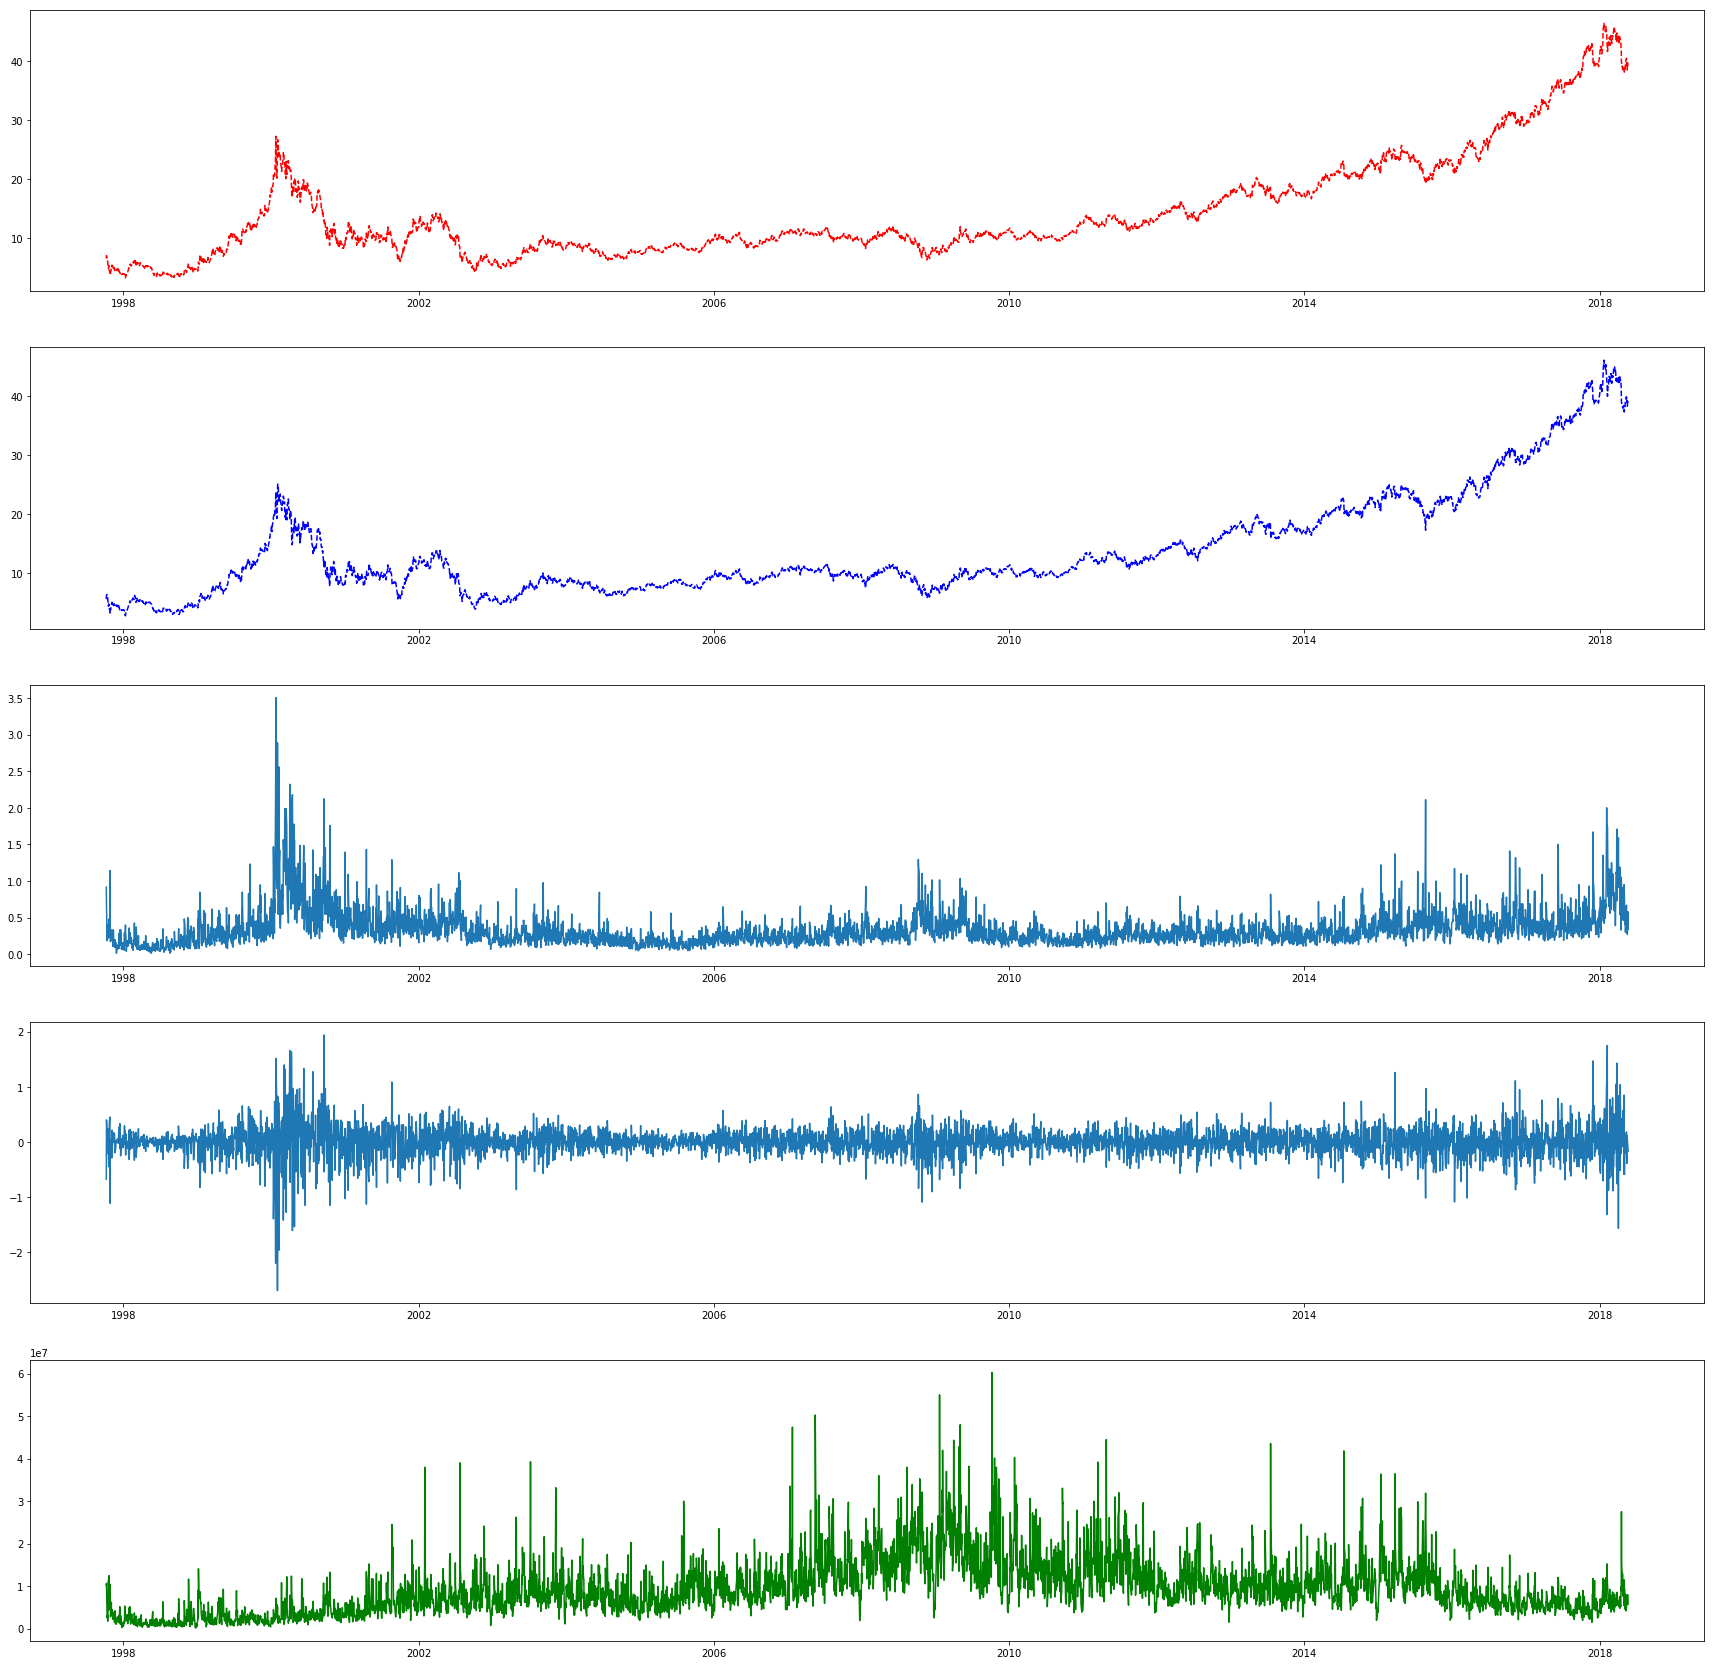

In [3]:
#plt.plot_date(shit['Date'], shit['Open'])
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 30)



plt.close()

plt.figure(1)
plt.subplot(511)
plt.plot_date(shit.index, shit['High'], 'r--')

plt.subplot(512)
plt.plot_date(shit.index, shit['Low'], 'b--')

plt.subplot(513)
plt.plot_date(shit.index, (shit['High'] - shit['Low']), '-')

plt.subplot(514)
plt.plot_date(shit.index, (shit['Open'] - shit['Close']), '-')

plt.subplot(515)
plt.plot_date(shit.index, shit['Volume'], 'g-')

plt.show()

Populating the interactive namespace from numpy and matplotlib


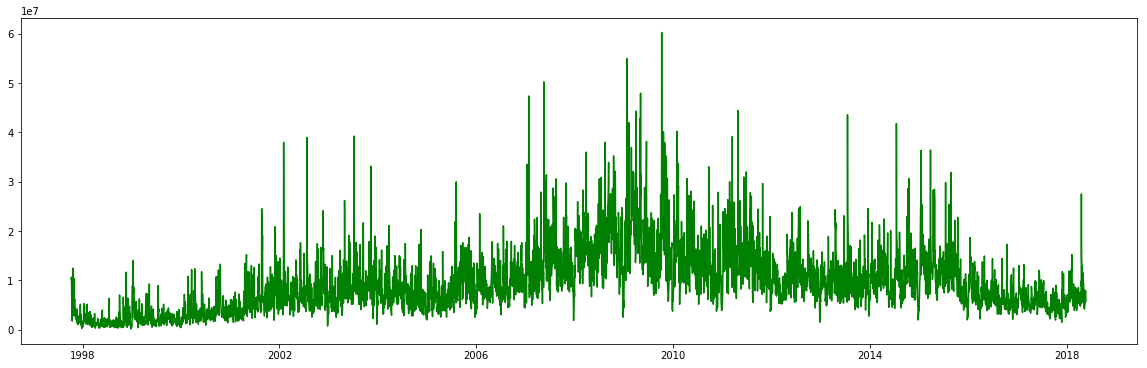

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)


plt.close()
plt.plot_date(shit.index, shit['Volume'], 'g-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [5]:
#resample by week
#shit['DateTime'].resample('W', how='sum')

In [6]:
#Smoothing by week/month (NOT causal filter)

df = shit.resample('M').sum()

In [7]:
shit.iloc[1000].index

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Populating the interactive namespace from numpy and matplotlib


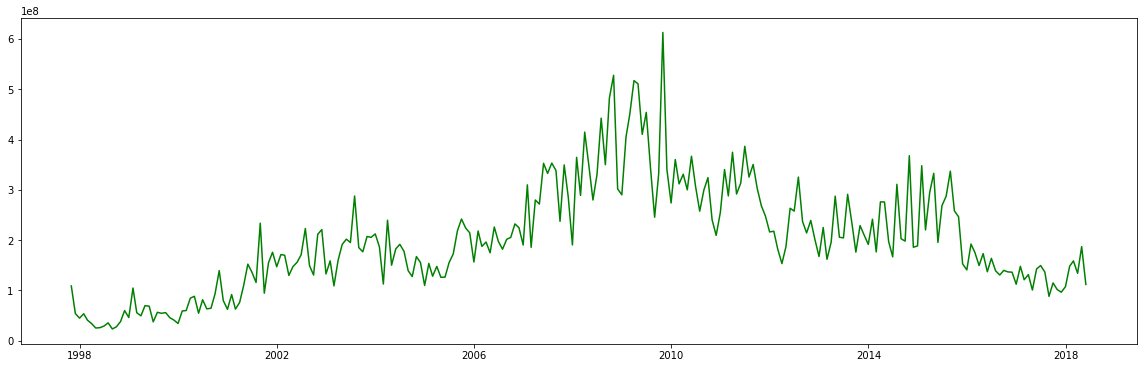

In [8]:
df.index

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)


plt.close()
plt.plot_date(df.index, df["Volume"], 'g-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [9]:
for index, row in shit.head(1).iterrows():
    asdf = index
    for i in range(20):
        asdf += datetime.timedelta(days=1)
    print(shit.loc[index]["Low"])

5.64604


In [10]:
shit.index

DatetimeIndex(['1997-10-09', '1997-10-10', '1997-10-13', '1997-10-14',
               '1997-10-15', '1997-10-16', '1997-10-17', '1997-10-20',
               '1997-10-21', '1997-10-22',
               ...
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-21', '2018-05-22'],
              dtype='datetime64[ns]', name='DateTime', length=5188, freq=None)

In [11]:
#causal filter
def cfilter(df, interval, attr):
    """Pass in a pandas dataframe, a number of days, and column name
    and get back a dataframe with a mean value causal filter applied to each row over each interval"""
    indeces = df.index
    return_dict = {} #smoothed dataset
    for index, row in df.iterrows():
        date_min = index - datetime.timedelta(days=interval + 1)
        date_current = index
        datesum = 0           #stores sum of values in interval
        dateind = 0           #stores number of valid dates per interval
        while date_min != date_current:
            date_min += datetime.timedelta(days=1)
            #check if date exists in dataset
            if date_min in indeces:
                dateind += 1
                datesum += df.loc[date_min][attr]
        
        #if there are no attributes within the cutoff date, just add current index
        if dateind == 0:
            return_dict[date_current] = row[attr]
        else:
            return_dict[date_current] = datesum/dateind
        
    return return_dict
            
            
            
        

In [12]:
x = cfilter(shit, 30, "Low")

In [13]:
xd = pd.DataFrame.from_dict(x, orient='index')

In [14]:
#rename the first column
xd.columns = ['Low']

In [15]:
list(xd.iloc[:,0])

[5.64604,
 6.0047295,
 6.150862333333333,
 6.1209715000000005,
 6.0578688,
 6.018014333333333,
 5.919327285714286,
 5.735712375,
 5.638659555555556,
 5.5450755,
 5.427444636363637,
 5.316134083333334,
 5.186181461538462,
 5.0529685,
 4.985342533333334,
 4.91205475,
 4.863018235294118,
 4.846737833333333,
 4.838463947368421,
 4.8423095499999995,
 4.8559106666666665,
 4.852575090909091,
 4.753427952380951,
 4.763204636363636,
 4.76000156521739,
 4.679715173913042,
 4.617334391304347,
 4.482671047619048,
 4.490262363636364,
 4.4902623913043485,
 4.489107217391305,
 4.471779217391305,
 4.487732,
 4.492074000000001,
 4.494305652173914,
 4.594729318181819,
 4.67757815,
 4.666760523809525,
 4.655718636363637,
 4.660549500000001,
 4.658737954545455,
 4.626431749999999,
 4.628804047619046,
 4.621299,
 4.582048454545454,
 4.548836454545454,
 4.5035474,
 4.472549523809524,
 4.4443696363636365,
 4.391230454545456,
 4.3465452272727285,
 4.30560385,
 4.280236190476191,
 4.256570818181818,
 4.2093839

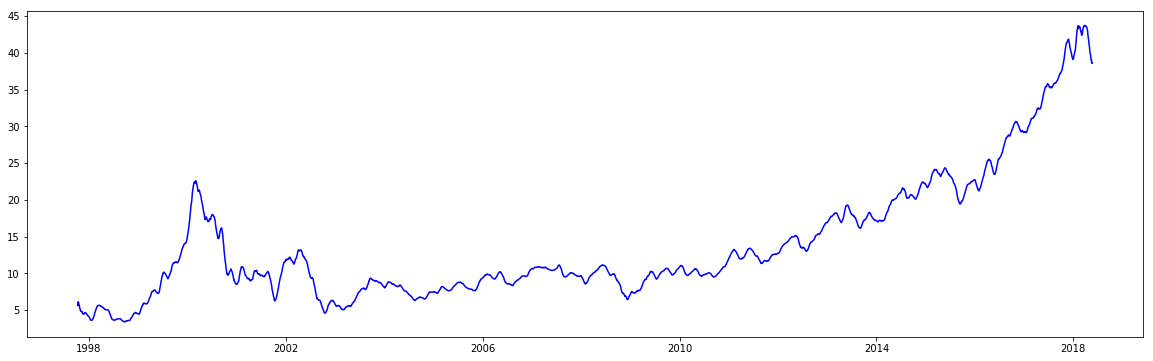

In [16]:
plt.close()
plt.plot_date(xd.index, xd["Low"], 'b-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [17]:
#output dataset is same length as original
len(xd) == len(shit)

True

In [18]:
"""The idea is that volume is related to the second derivative of the price. 

First, for every column in your data set, please generate an average of the data at each date. 

The average should be for 3 days, 1 week, 1 month and 3 months. 

Then generate the velocity and acceleration of the stock price. 

The daily velocity = closing price - opening price. 

The acceleration is today's velocity - yesterday's velocity. 

Then generate the average of the velocity and acceleration for 3 days, 1 week, 1 month and 3 months. 
"""

"The idea is that volume is related to the second derivative of the price. \n\nFirst, for every column in your data set, please generate an average of the data at each date. \n\nThe average should be for 3 days, 1 week, 1 month and 3 months. \n\nThen generate the velocity and acceleration of the stock price. \n\nThe daily velocity = closing price - opening price. \n\nThe acceleration is today's velocity - yesterday's velocity. \n\nThen generate the average of the velocity and acceleration for 3 days, 1 week, 1 month and 3 months. \n"

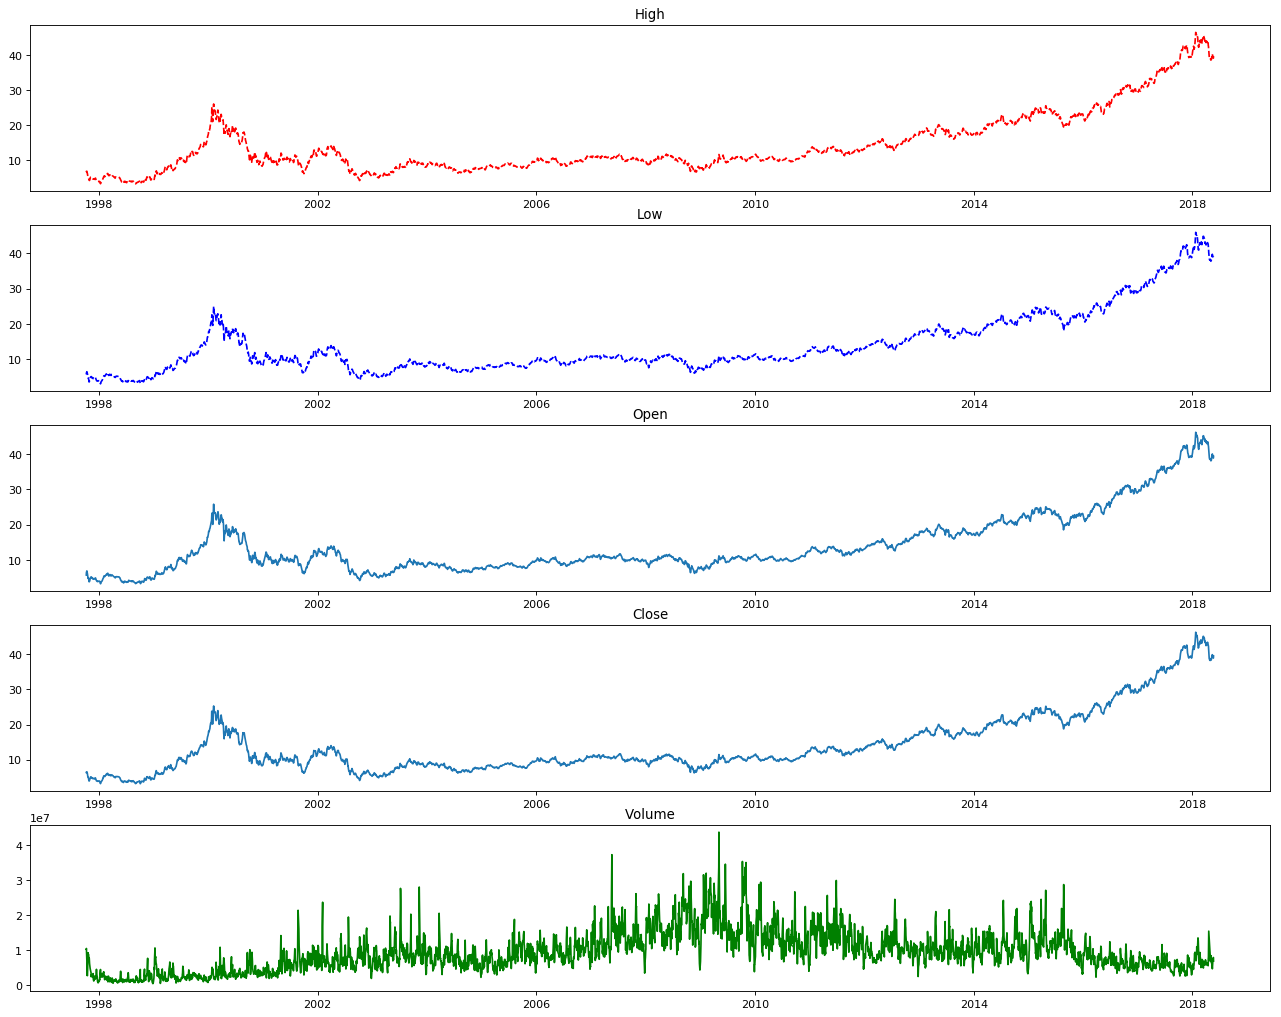

In [19]:
"""average 3 days"""
threedays = 3

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, threedays, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

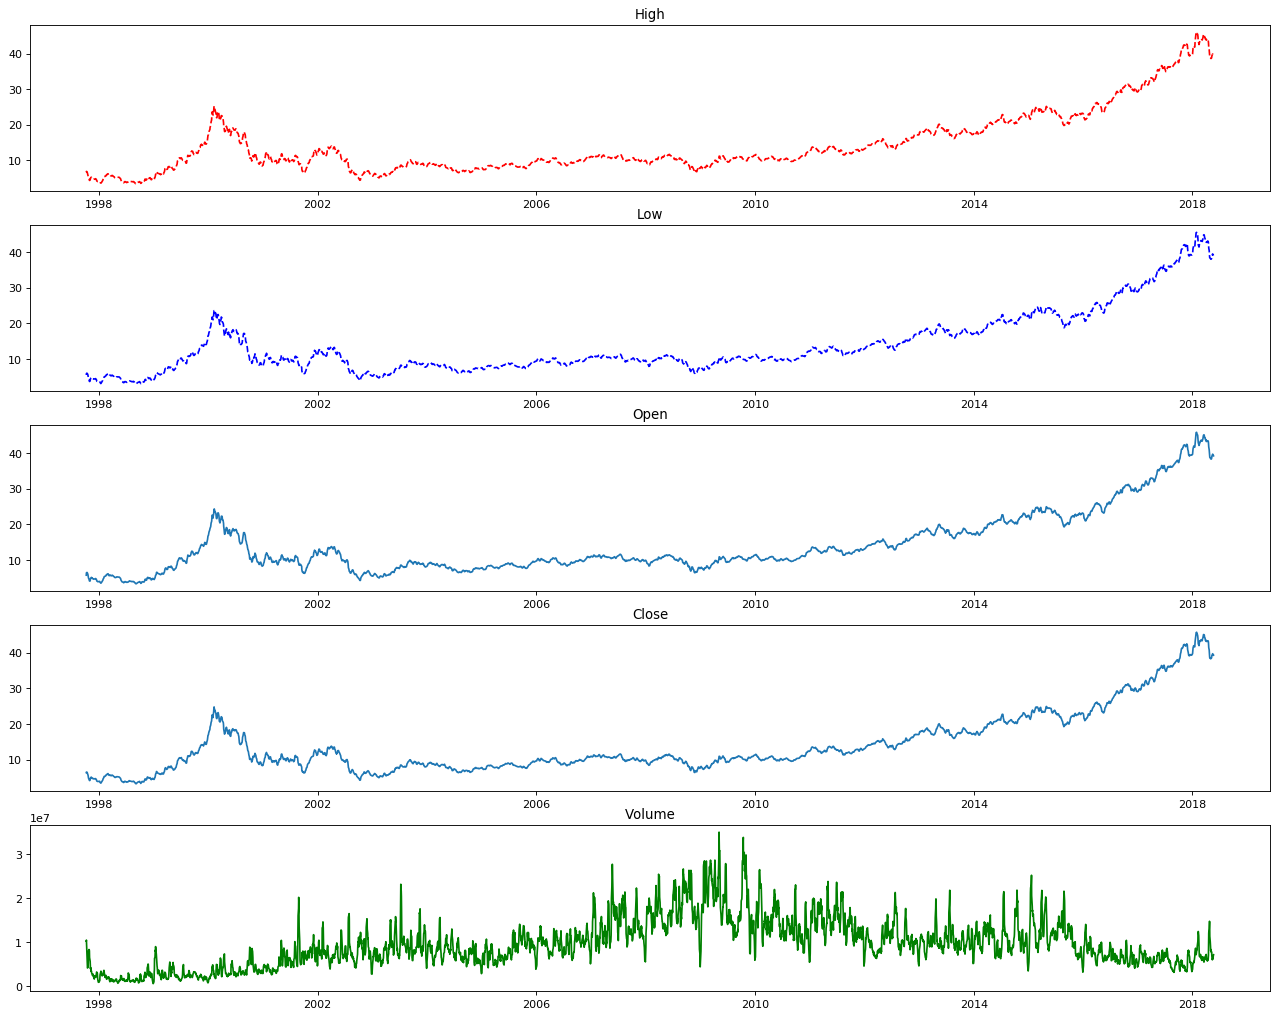

In [83]:
"""average 1 week"""
week = 7

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, week, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

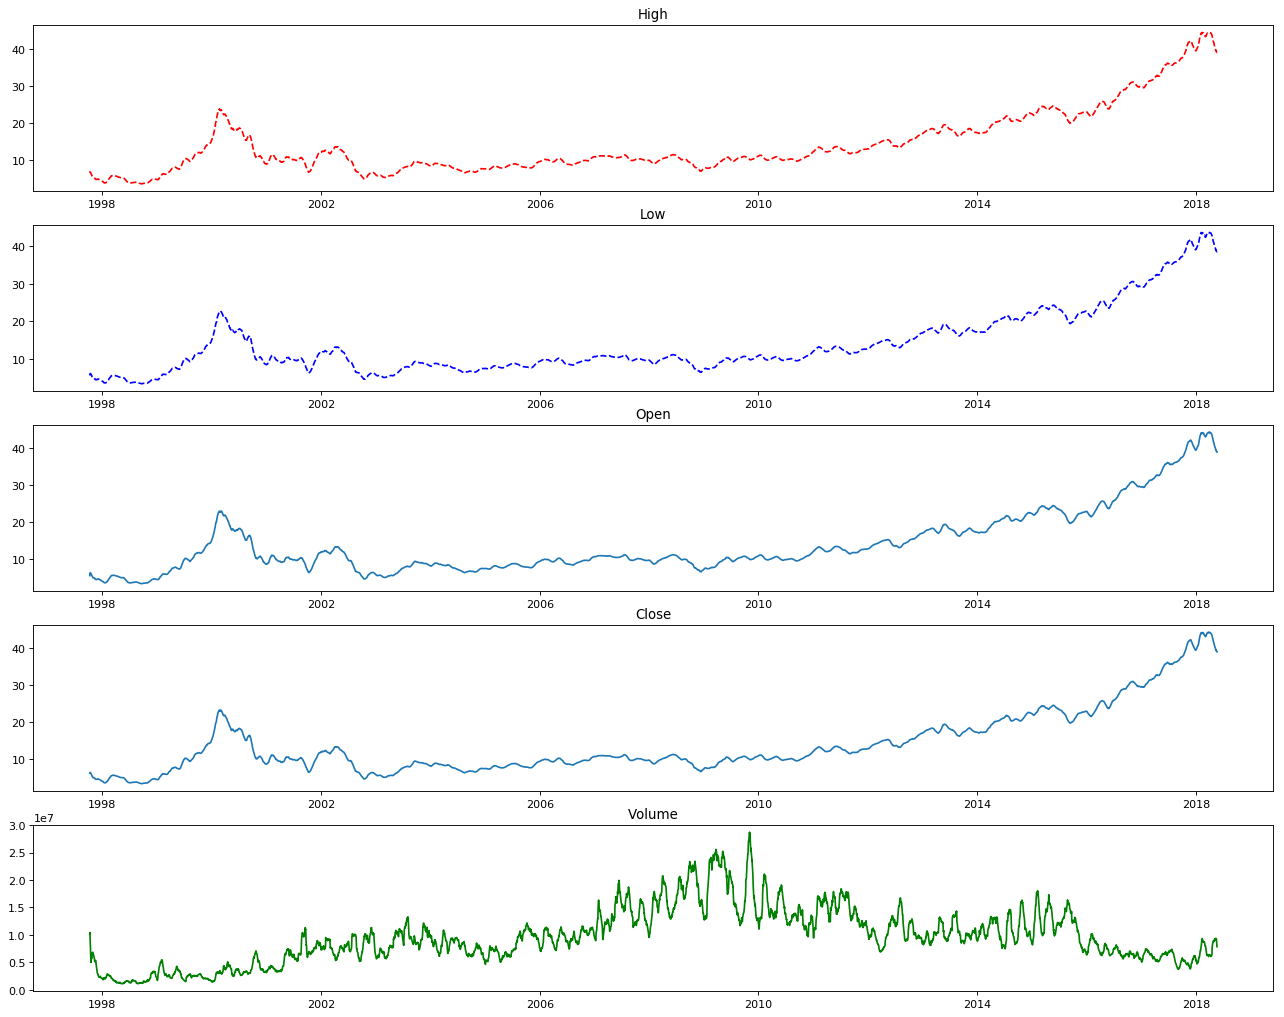

In [84]:
"""Average 1 month"""
month = 30

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, month, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

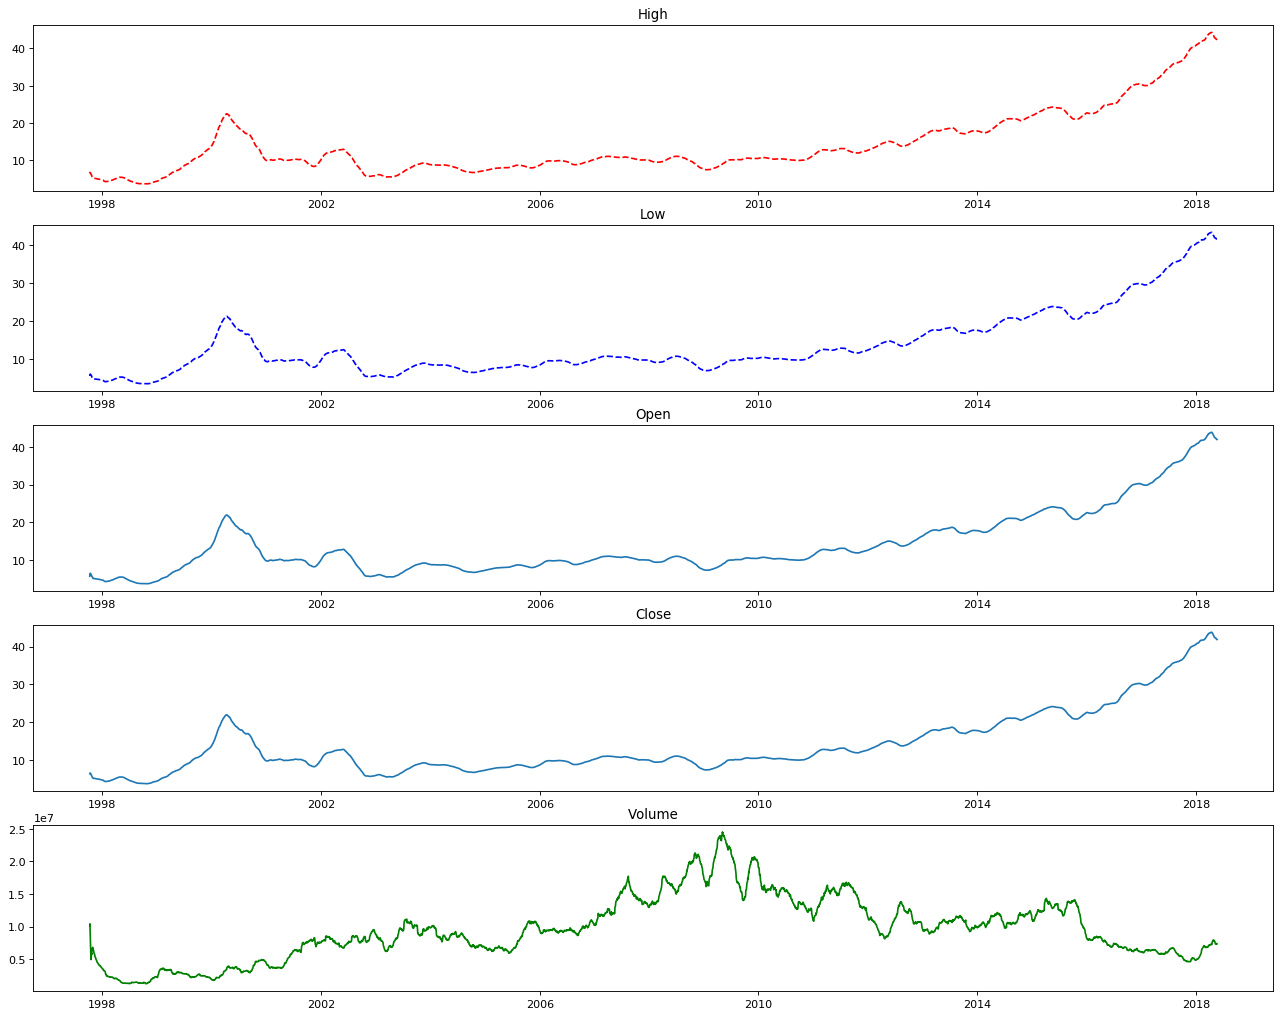

In [85]:
"""Average 3 months"""
threemonth = 90

#'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'


plt.close()

plt.figure(1, figsize=(20, 16), dpi=80)
plt.subplot(511)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "High"), orient='index')
xd.columns = ['High']
plt.plot_date(xd.index, xd['High'], 'r--')
plt.title("High")

plt.subplot(512)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Low"), orient='index')
xd.columns = ['Low']
plt.plot_date(xd.index, xd['Low'], 'b--')
plt.title("Low")


plt.subplot(513)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Open"), orient='index')
xd.columns = ['Open']
plt.plot_date(xd.index, xd['Open'], '-')
plt.title("Open")


plt.subplot(514)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Close"), orient='index')
xd.columns = ['Close']
plt.plot_date(xd.index, xd['Close'], '-')
plt.title("Close")


plt.subplot(515)
xd = pd.DataFrame.from_dict(cfilter(shit, threemonth, "Volume"), orient='index')
xd.columns = ['Volume']
plt.plot_date(xd.index, xd['Volume'], 'g-')
plt.title("Volume")



#plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [55]:
shit["dailyvel"]

DateTime
1997-10-09    0.677525
1997-10-10   -0.398544
1997-10-13   -0.159418
1997-10-14   -0.212557
1997-10-15    0.212557
1997-10-16   -0.185987
1997-10-17   -0.239127
1997-10-20    0.212557
1997-10-21    0.451683
1997-10-22   -0.199272
1997-10-23   -0.132848
1997-10-24   -0.345405
1997-10-27   -0.451683
1997-10-28    1.115924
1997-10-29   -0.039854
1997-10-30    0.119563
1997-10-31    0.106279
1997-11-03    0.252411
1997-11-04    0.039854
1997-11-05    0.292266
1997-11-06   -0.212557
1997-11-07    0.252411
1997-11-10   -0.172703
1997-11-11   -0.013285
1997-11-12   -0.119563
1997-11-13   -0.092994
1997-11-14   -0.092994
1997-11-17    0.013285
1997-11-18   -0.159417
1997-11-19   -0.079708
                ...   
2018-04-11    0.130001
2018-04-12    0.519996
2018-04-13   -1.039997
2018-04-16    0.059998
2018-04-17    0.220001
2018-04-18   -0.180000
2018-04-19   -0.400001
2018-04-20   -0.419998
2018-04-23   -0.209999
2018-04-24   -0.290001
2018-04-25   -0.190003
2018-04-26    0.089996
20

In [56]:
shit["acceleration"]

DateTime
1997-10-09    0.000000
1997-10-10   -1.076069
1997-10-13    0.239126
1997-10-14   -0.053139
1997-10-15    0.425114
1997-10-16   -0.398544
1997-10-17   -0.053140
1997-10-20    0.451684
1997-10-21    0.239126
1997-10-22   -0.650955
1997-10-23    0.066424
1997-10-24   -0.212557
1997-10-27   -0.106278
1997-10-28    1.567607
1997-10-29   -1.155778
1997-10-30    0.159417
1997-10-31   -0.013284
1997-11-03    0.146132
1997-11-04   -0.212557
1997-11-05    0.252412
1997-11-06   -0.504823
1997-11-07    0.464968
1997-11-10   -0.425114
1997-11-11    0.159418
1997-11-12   -0.106278
1997-11-13    0.026569
1997-11-14    0.000000
1997-11-17    0.106279
1997-11-18   -0.172702
1997-11-19    0.079709
                ...   
2018-04-11    0.419998
2018-04-12    0.389995
2018-04-13   -1.559993
2018-04-16    1.099995
2018-04-17    0.160003
2018-04-18   -0.400001
2018-04-19   -0.220001
2018-04-20   -0.019997
2018-04-23    0.209999
2018-04-24   -0.080002
2018-04-25    0.099998
2018-04-26    0.279999
20

In [51]:
"""daily velocity = closing price - opening price. Add velocity and acceleration to dataframe"""

shit["dailyvel"] = shit["Close"] - shit["Open"]
shit.columns

#The acceleration is today's velocity - yesterday's velocity. 
acc = [0]
for i in range(len(shit) - 1):
    acc.append(shit["dailyvel"][i + 1] - shit["dailyvel"][i])
shit["acceleration"] = acc

    

In [69]:
shit.iloc[2:]



,Date,Open,High,Low,Close,Adj Close,Volume,dailyvel,acceleration
DateTime,,,,,,,,,
1997-10-13,1997-10-13,6.629115,6.629115,6.443128,6.469697,4.011640,3043300,-0.159418,0.239126
1997-10-14,1997-10-14,6.416558,6.429843,6.031299,6.204001,3.846890,2549200,-0.212557,-0.053139
1997-10-15,1997-10-15,5.818742,6.044584,5.805458,6.031299,3.739804,3166400,0.212557,0.425114
1997-10-16,1997-10-16,6.031299,6.031299,5.818742,5.845312,3.624480,1770200,-0.185987,-0.398544
1997-10-17,1997-10-17,5.579616,5.592901,5.327205,5.340489,3.311456,3286800,-0.239127,-0.053140
1997-10-20,1997-10-20,4.463693,4.782528,4.450408,4.676250,2.899583,11499100,0.212557,0.451684
1997-10-21,1997-10-21,4.888806,5.340489,4.862237,5.340489,3.311456,6924100,0.451683,0.239126
1997-10-22,1997-10-22,4.915376,4.928661,4.702819,4.716104,2.924296,4457800,-0.199272,-0.650955
1997-10-23,1997-10-23,4.569971,4.569971,4.251136,4.437123,2.751310,12493100,-0.132848,0.066424


Text(0.5,1,'acceleration')

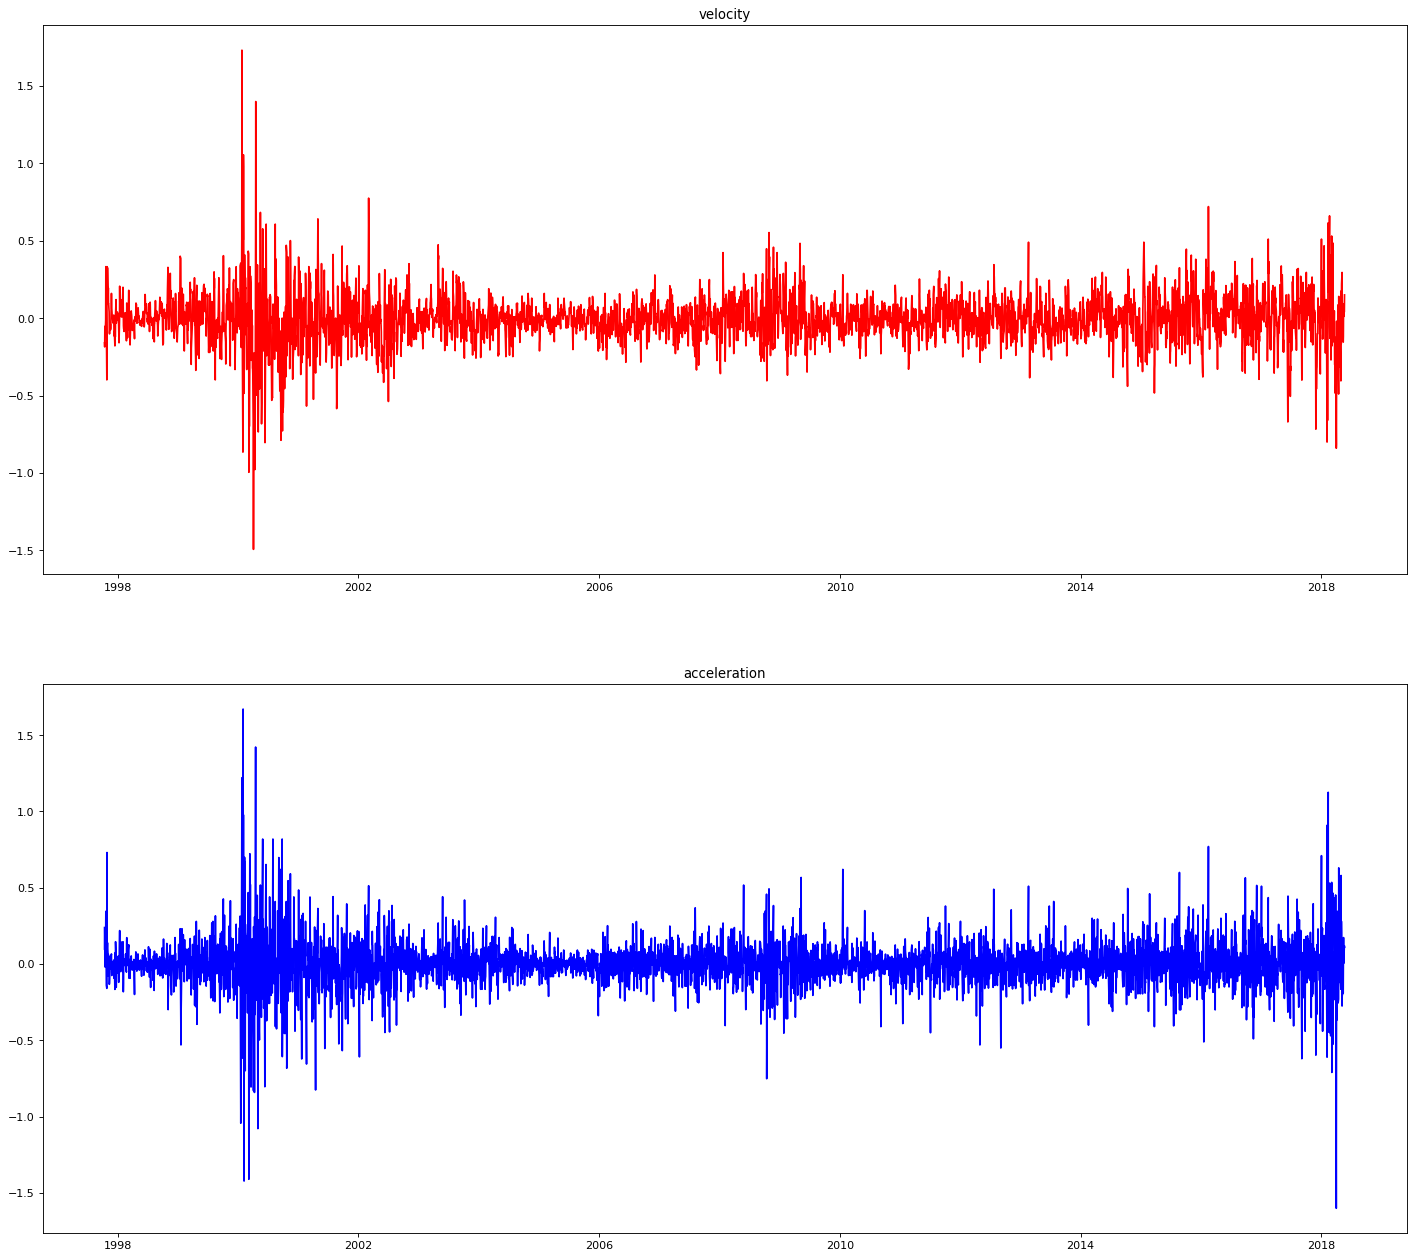

In [70]:
"""3 days"""
plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threedays, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threedays, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration")

Text(0.5,1,'acceleration')

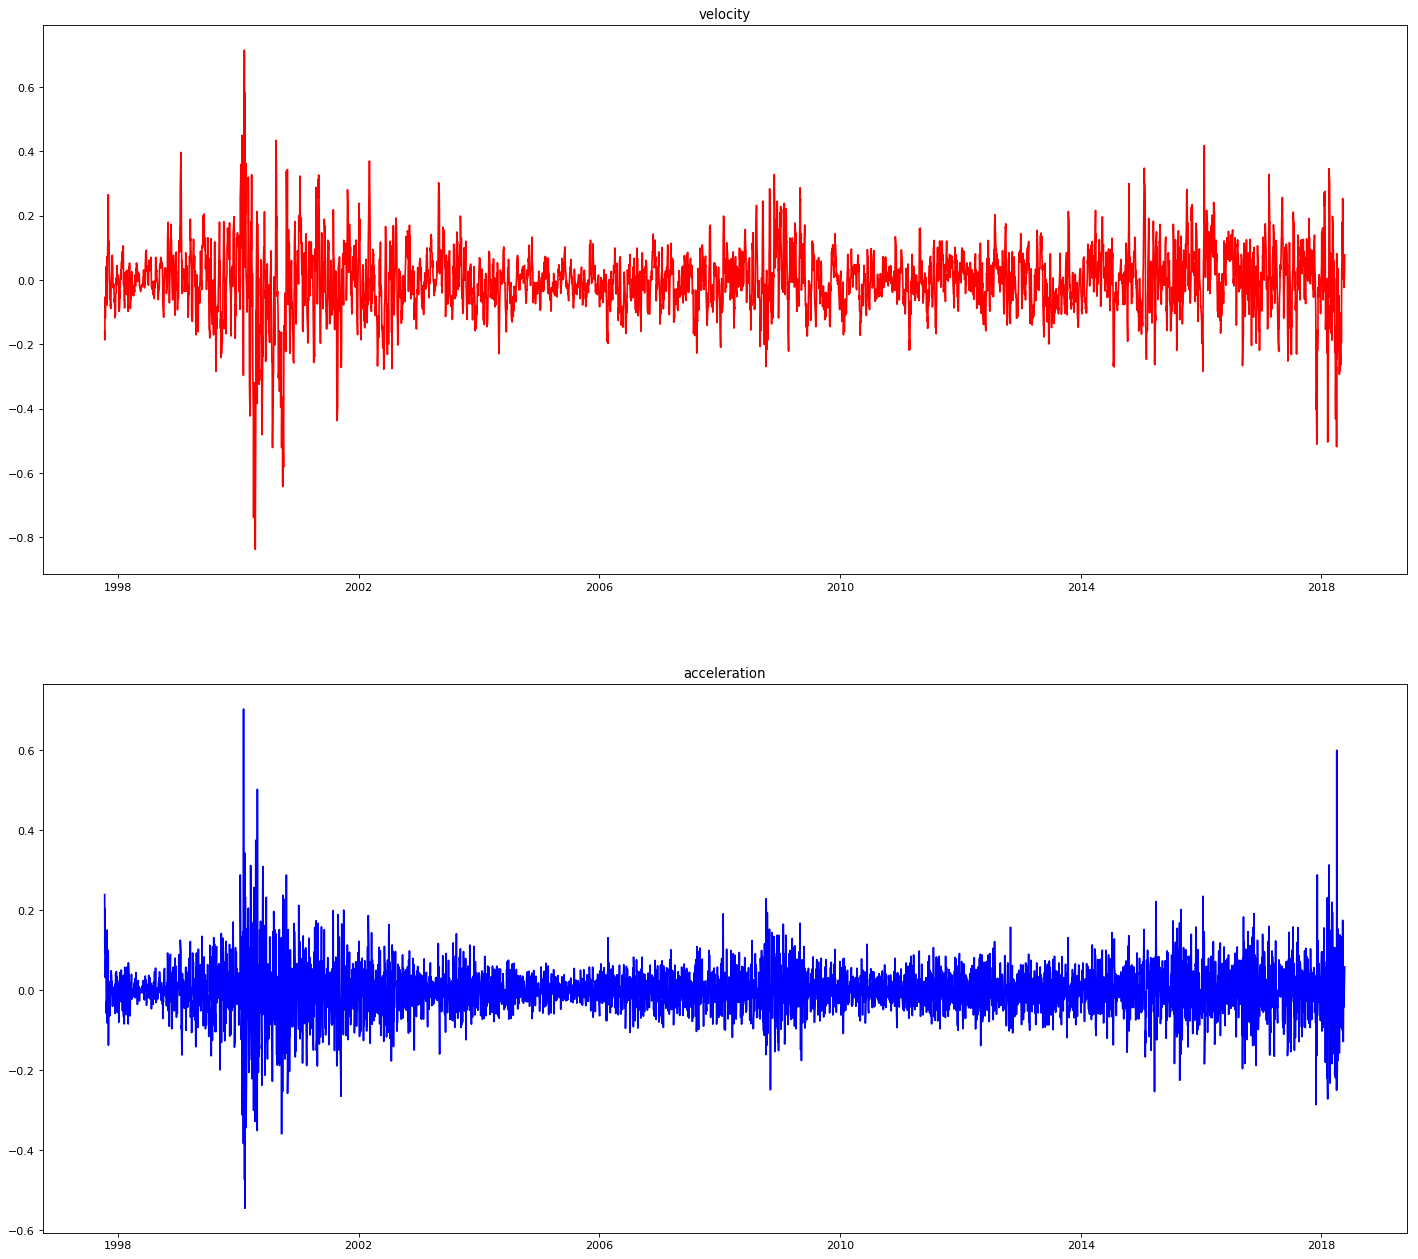

In [71]:
"""week velocity and acceleration"""
week = 7

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], week, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], week, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration")

Text(0.5,1,'acceleration')

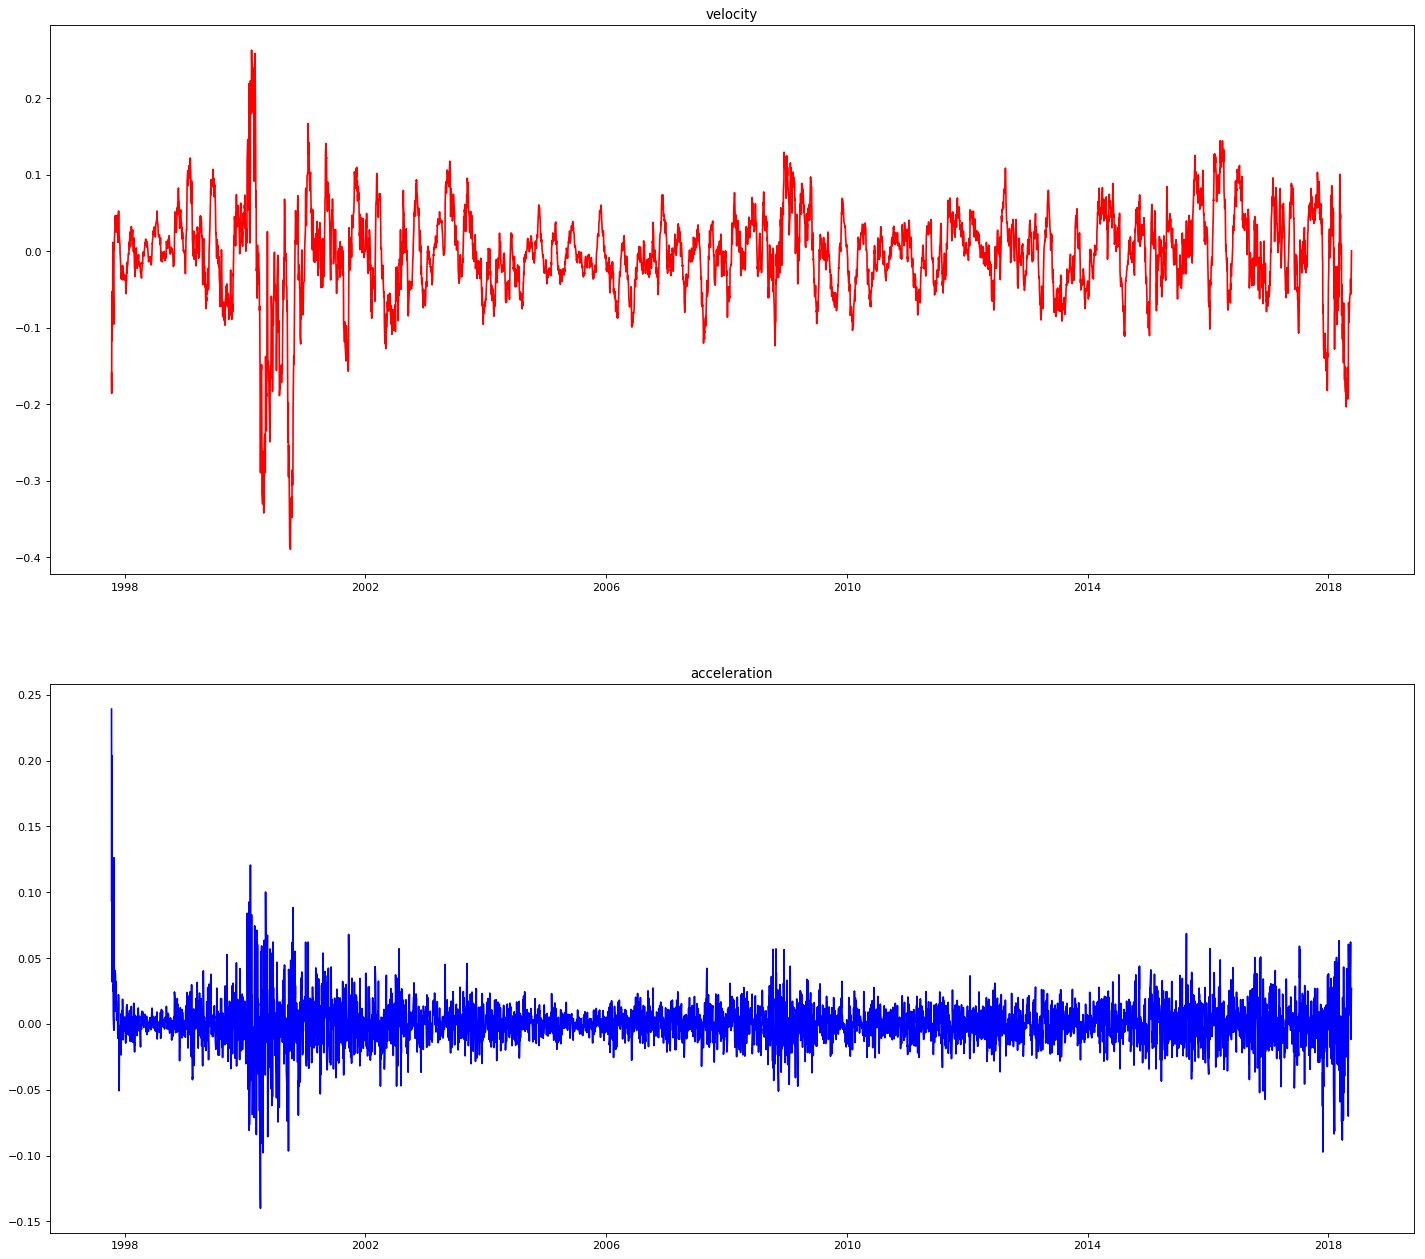

In [72]:
"""month velocity and acceleration"""
month = 30

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], month, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], month, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration")

Text(0.5,1,'acceleration')

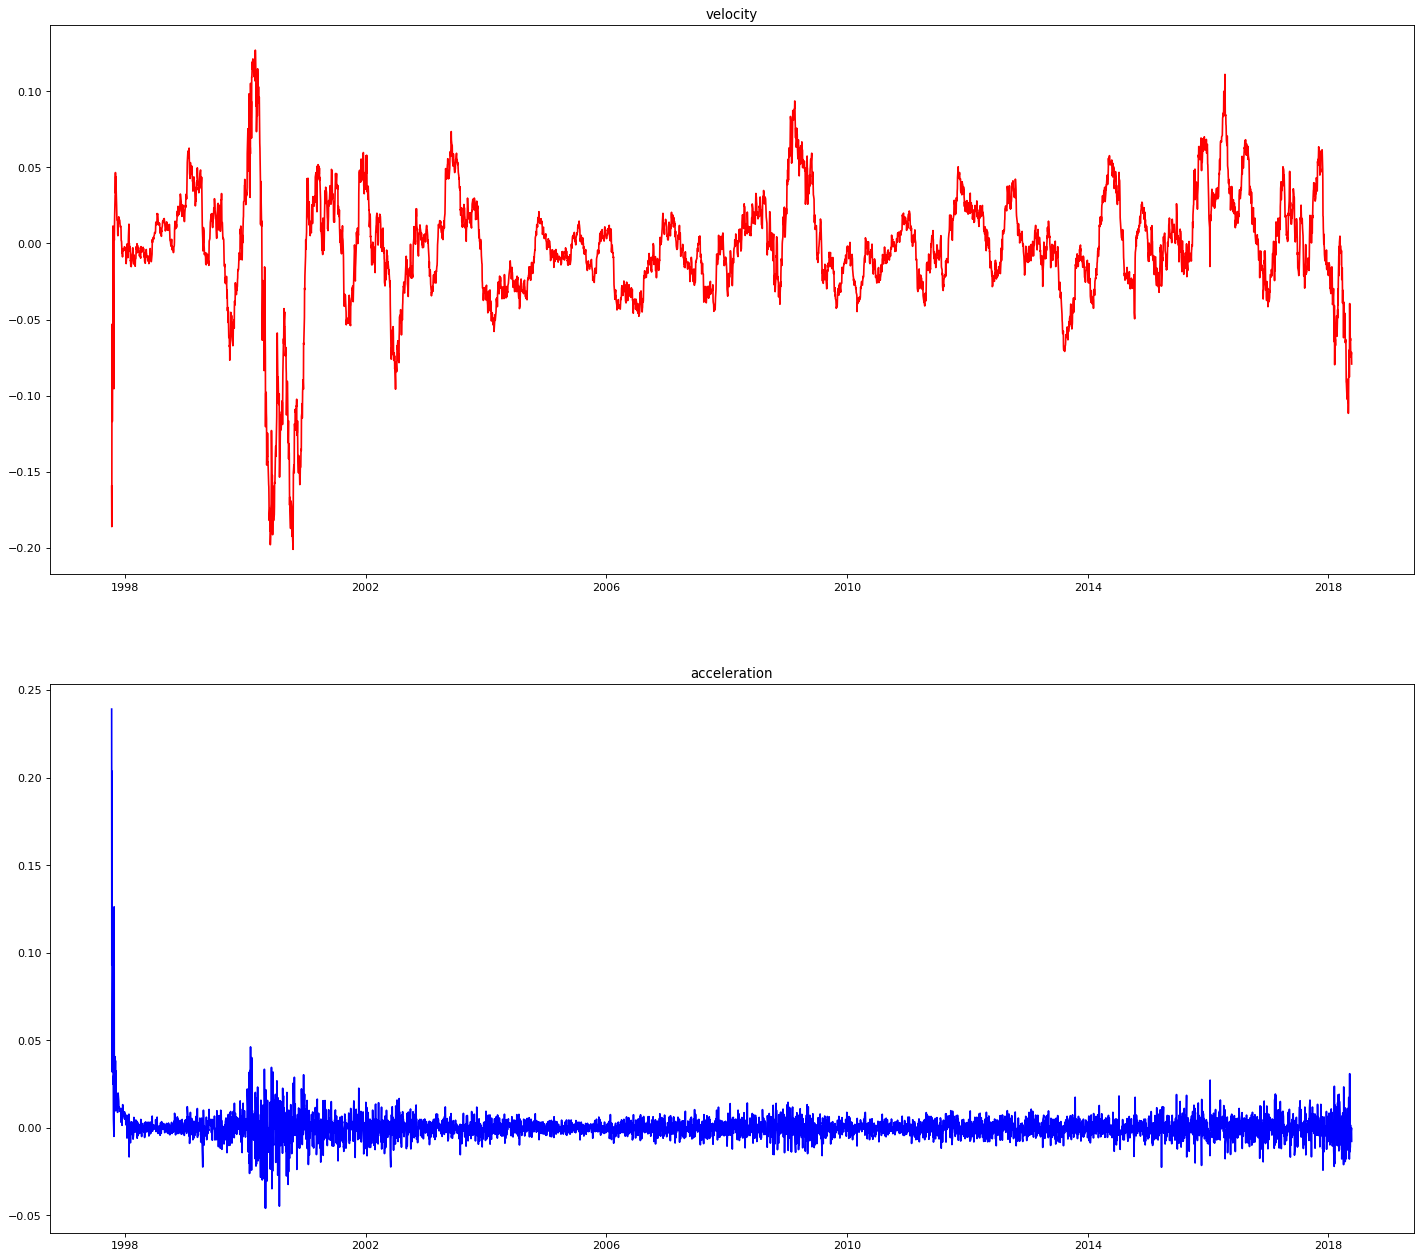

In [73]:
"""3 month velocity and acceleration"""
threemonth = 90

plt.figure(1, figsize=(22, 20), dpi=80)
plt.subplot(211)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threemonth, "dailyvel"), orient='index')
xd.columns = ['dailyvel']
plt.plot_date(xd.index, xd['dailyvel'], 'r-')
plt.title("velocity")

plt.subplot(212)
xd = pd.DataFrame.from_dict(cfilter(shit.iloc[2:], threemonth, "acceleration"), orient='index')
xd.columns = ['acceleration']
plt.plot_date(xd.index, xd['acceleration'], 'b-')
plt.title("acceleration")

In [75]:
"""correlation between the acceleration and the volume. For this task generate a scatter plot and determine the R-square of the acceleration vs the volume. Do this for the 1 day, 3 day, 1 week, 1 month and 3-month averages"""

'correlation between the acceleration and the volume. For this task generate a scatter plot and determine the R-square of the acceleration vs the volume. Do this for the 1 day, 3 day, 1 week, 1 month and 3-month averages'

In [93]:
from scipy import stats

acc_1day = list(shit.iloc[2:]["acceleration"])
vel_1day = list(shit.iloc[2:]["dailyvel"])
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(acc_1day,vel_1day)
print("r-squared for 1 day:", r_value1**2)

acc_3day = cfilter(shit.iloc[2:], 3, "acceleration")
vel_3day = cfilter(shit.iloc[2:], 3, "dailyvel")
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(list(acc_3day.values()),list(vel_3day.values()))
print("r-squared for 3 days:", r_value3**2)


acc_week = cfilter(shit.iloc[2:], 7, "acceleration")
vel_week = cfilter(shit.iloc[2:], 7,"dailyvel")
slope7, intercept7, r_value7, p_value7, std_err7 = stats.linregress(list(acc_week.values()),list(vel_week.values()))
print ("r-squared for 1 week:", r_value7**2)

acc_mon = cfilter(shit.iloc[2:], 30, "acceleration")
vel_mon = cfilter(shit.iloc[2:], 30, "dailyvel")
slope30, intercept30, r_value30, p_value30, std_err30 = stats.linregress(list(acc_mon.values()),list(vel_mon.values()))
print ("r-squared for 1 month:", r_value30**2)

acc_3mon = cfilter(shit.iloc[2:], 90, "acceleration")
vel_3mon = cfilter(shit.iloc[2:], 90, "dailyvel")
slope90, intercept90, r_value90, p_value90, std_err90 = stats.linregress(list(acc_3mon.values()),list(vel_3mon.values()))
print ("r-squared for 3 months:", r_value90**2)

r-squared for 1 day: 0.5112730531716875
r-squared for 3 days: 0.2421681633270869
r-squared for 1 week: 0.0891003907190565
r-squared for 1 month: 0.012323669152954023
r-squared for 3 months: 0.0002439104947390644
